<a href="https://colab.research.google.com/github/Anna-bellz/Project2021/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import neccessary modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import numpy as np
import os
import keras 

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Dense,GlobalMaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16, InceptionV3,MobileNetV3Small,VGG19,ResNet50,ResNet50V2,MobileNet,mobilenet_v2,mobilenet_v3

from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from glob import glob
import cv2


## Function for plotting graph

In [ ]:
def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=10)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=10)
    plt.legend()
    plt.grid(True)
    plt.show()

## Read data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change to your path
mypath = '/content/drive/My Drive/Project500/'

อ่านไฟล์ภาพในแฟ้ม COVID19

In [ ]:
filenames = glob(mypath + 'Covid19/' + '*.jpg') #ใช้ glob อ่านไฟล์ตามพาธที่กำหนด
np.random.shuffle(filenames) #อ่านแบบสุ่ม
COVID19_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames] #รูปขนาด 1024x1024 ทำการ resize เป็น 224X224

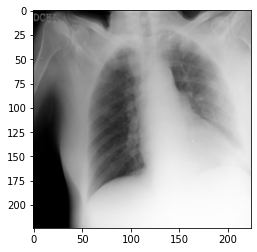

In [ ]:
plt.imshow(COVID19_images[0])
plt.show()

In [ ]:
X=np.array(COVID19_images)
X.shape

(500, 224, 224, 3)

อ่านไฟล์ภาพในแฟ้ม LUNG

In [ ]:
filenames = glob(mypath + 'Lung/' + '*.jpg')
np.random.shuffle(filenames)
LUNG_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames[:]]

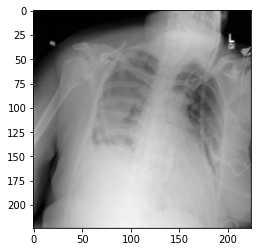

In [ ]:
plt.imshow(LUNG_images[0])
plt.show()

In [ ]:
X=np.array(LUNG_images)
X.shape

(500, 224, 224, 3)

อ่านไฟล์ภาพในแฟ้ม NORMAL

In [ ]:
filenames = glob(mypath + 'Normal/' + '*.jpg')
np.random.shuffle(filenames)
NORMAL_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames[:]]

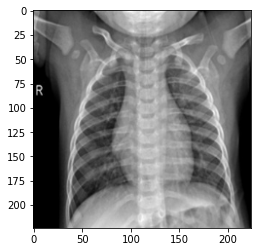

In [ ]:
plt.imshow(NORMAL_images[0])
plt.show()

In [ ]:
X=np.array(NORMAL_images)
X.shape

(500, 224, 224, 3)

อ่านไฟล์ภาพในแฟ้ม PNEUMONIA

In [ ]:
filenames = glob(mypath + 'Pneumonia/' + '*.jpg')
np.random.shuffle(filenames)
PNEUMONIA_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames[:]]

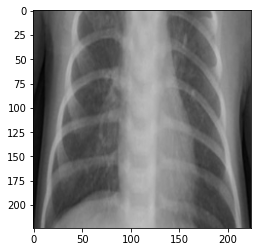

In [ ]:
plt.imshow(PNEUMONIA_images[0])
plt.show()

In [ ]:
X=np.array(PNEUMONIA_images)
X.shape

(500, 224, 224, 3)

# Convolutional Neural Network

> เตรียม Dataset สำหรับการ Train

> นำ List (normal_images+covid_images)

> แปลง List --> np.array

> ทำการ Normalize (0-1) ด้วยการ /255

####Note: ทำไมต้อง Normalize
>ไฟล์รูปภาพที่ได้ออกมาเป็นรูป RGB (WxHxRGB) เป็นอาเรย์ 3 มิติ โดยค่าที่อยู่ในอาเรย์มีค่า 0-255 ถ้าเราใช้ค่าในนี้ไปเทรนในนิวรอลเลย จะต้องเสียเวลาในการเทรนเพื่อให้น้ำหนักของมันสู้กับค่าที่อยู่ในอาเรย์พวกนี้ได้ ในทางปฎิบัติเค้าจะปรับค่าของมันให้อยู่ในช่วง 0-1 ทำได้โดย เอา 255 หารทุกตัวในอาเรย์ ตามค่าที่สูงที่สุด ถ้าเป็น List จะต้องวนลูปไปหารทุกค่า แต่ถ้าในอาเรย์ใช้คำสั่งเดียวมันเข้าไปหารให้ทุกช่องเลย

>ใช้ float เพื่อไม่ให้ /255 แล้วเป็น 0 หรือ 1 เลย แต่มันจะค่อยๆปรับ ค่า

เตรียม X: input

In [ ]:
X=np.array(COVID19_images+LUNG_images+NORMAL_images+PNEUMONIA_images).astype('float32')/255

In [ ]:
X.shape

(2000, 224, 224, 3)



###เตรียม Y: Output

In [ ]:
Y = np.array([0] * 500 + [1] * 500 + [2] * 500+ [3] * 500)    
Y

array([0, 0, 0, ..., 3, 3, 3])

### แบ่งชุดข้อมูล
80:20

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X , Y , train_size =0.80, test_size =0.20, random_state =30)

In [ ]:
x_train.shape

(1600, 224, 224, 3)

In [ ]:
x_test.shape

(400, 224, 224, 3)

In [ ]:
y_train.shape

(1600,)

In [ ]:
y_test.shape

(400,)

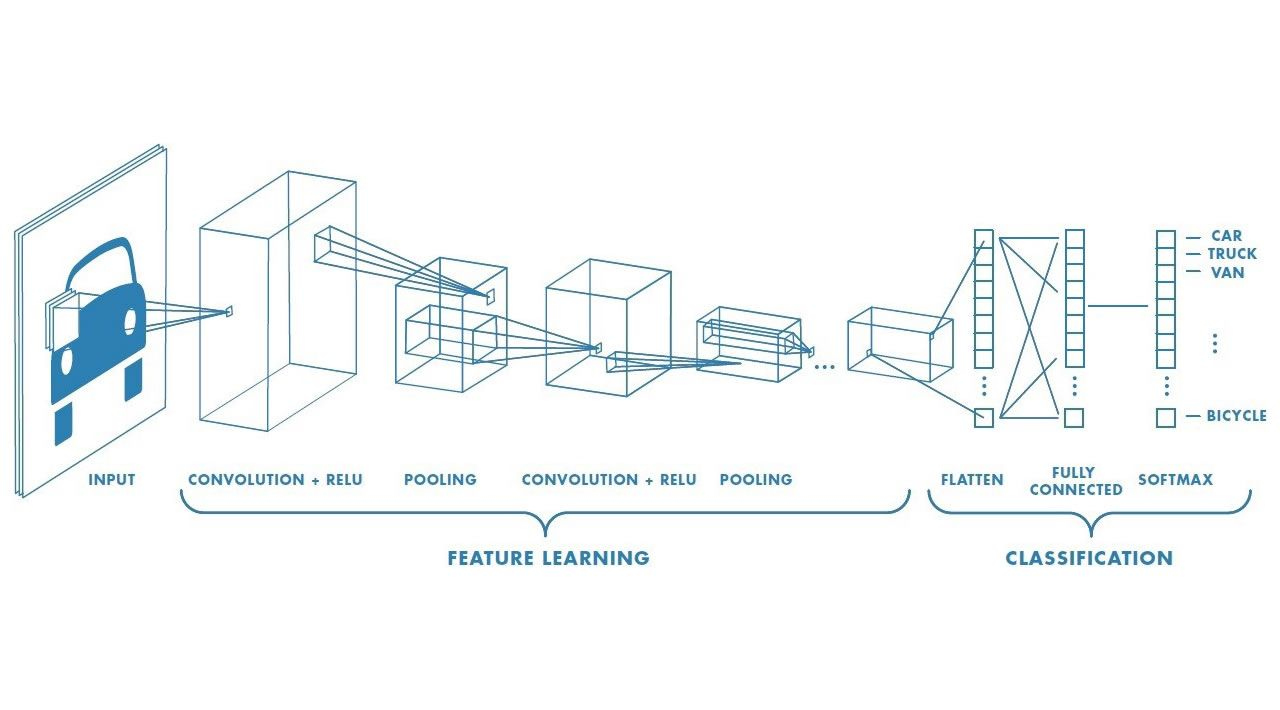

## Build the model

In [ ]:
# model =Sequential()
# model.add(Conv2D(64,(5,5),activation='relu',input_shape = (244,244,3)))
# model.add(AveragePooling2D((2,2)))
# model.add(Conv2D(32,(5,5),activation='relu'))
# model.add(AveragePooling2D((2,2)))
# model.add(Flatten())
# model.add(Dense(6,activation='softmax'))

In [ ]:
model = Sequential()                                
model.add(Conv2D(64, (5,5), activation='relu', input_shape = (224,224,3) ))  #สกัดออกมา 64 feature  Window scan (5,5)
model.add(AveragePooling2D((2,2)))    #window pooling  2x2ดูค่า Max สุดดึงออกมา
model.add(Conv2D(32, (5,5), activation='relu' ))  #คัดเลือกออกมา 32 feature
model.add(AveragePooling2D((2,2)))
model.add(Flatten())  #แปลงอาร์เรย์หลายมิติเป็น เวกเตอร์ 1 มิติ
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
average_pooling2d (AveragePo (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      51232     
_________________________________________________________________
average_pooling2d_1 (Average (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 539334    
Total params: 595,430
Trainable params: 595,430
Non-trainable params: 0
__________________________________________________

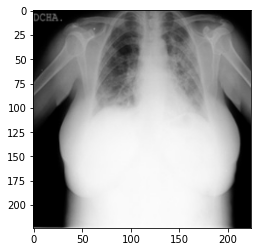

In [ ]:
plt.imshow(COVID19_images[1])   #ภาพพื้นหลัง แนะนำให้ใช้ 
plt.show()

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])  #lr=0.00001  0.001,0.0001
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=model.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
128/128 [==============================] - 38s 58ms/step - loss: 1.3588 - accuracy: 0.4234 - val_loss: 1.1415 - val_accuracy: 0.5000
Epoch 2/50
128/128 [==============================] - 7s 56ms/step - loss: 0.9836 - accuracy: 0.6242 - val_loss: 0.9087 - val_accuracy: 0.6094
Epoch 3/50
128/128 [==============================] - 7s 55ms/step - loss: 0.8341 - accuracy: 0.6680 - val_loss: 0.8057 - val_accuracy: 0.6969
Epoch 4/50
128/128 [==============================] - 7s 56ms/step - loss: 0.7659 - accuracy: 0.6984 - val_loss: 0.8138 - val_accuracy: 0.6687
Epoch 5/50
128/128 [==============================] - 7s 56ms/step - loss: 0.7337 - accuracy: 0.6984 - val_loss: 0.7630 - val_accuracy: 0.6875
Epoch 6/50
128/128 [==============================] - 7s 56ms/step - loss: 0.6994 - accuracy: 0.7117 - val_loss: 0.7319 - val_accuracy: 0.7188
Epoch 7/50
128/128 [==============================] - 7s 56ms/step - loss: 0.6666 - accuracy: 0.7359 - val_loss: 0.7279 - val_accuracy: 0.709

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 2s 78ms/step - loss: 0.4115 - accuracy: 0.8625


[0.4114777743816376, 0.862500011920929]

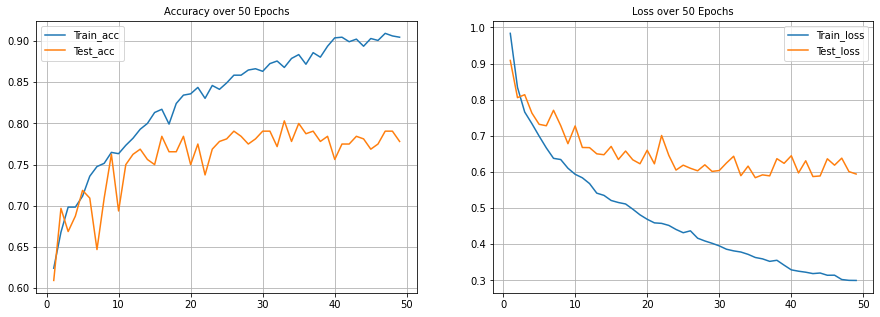

In [ ]:
plot_acc_loss(history, 50)

In [ ]:
y_pred =np.argmax(model.predict(x_test),axis=-1)
y_pred

array([3, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 0, 1, 2, 3,
       1, 3, 3, 1, 0, 2, 0, 1, 1, 3, 1, 3, 0, 0, 2, 1, 2, 1, 3, 0, 3, 2,
       1, 0, 2, 3, 3, 0, 0, 1, 3, 0, 0, 1, 0, 3, 2, 3, 3, 3, 0, 2, 2, 1,
       0, 3, 3, 2, 0, 1, 3, 0, 3, 2, 3, 2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 3,
       2, 3, 1, 0, 3, 3, 3, 0, 1, 3, 3, 1, 1, 0, 2, 2, 1, 3, 1, 1, 1, 2,
       0, 1, 0, 3, 2, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 1, 3, 3, 3, 0, 1,
       0, 0, 1, 3, 3, 1, 2, 0, 3, 1, 2, 2, 1, 3, 3, 2, 0, 3, 2, 1, 3, 0,
       0, 2, 1, 3, 0, 2, 3, 2, 3, 0, 2, 2, 1, 3, 1, 1, 2, 1, 3, 0, 2, 1,
       2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 2, 3, 3, 1, 2, 0, 2, 0, 3, 3, 3, 0,
       0, 0, 3, 1, 3, 0, 3, 3, 2, 1, 2, 3, 3, 0, 0, 0, 3, 1, 1, 0, 0, 2,
       1, 3, 2, 2, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 1, 0, 2, 1, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 3, 0, 1, 3, 1, 2, 0, 3, 0, 1, 2, 3, 1, 3, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 0, 3, 1, 1, 3, 2, 1,
       2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0,

In [ ]:
y_test

array([3, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 0, 1, 2, 3,
       1, 3, 3, 1, 0, 2, 1, 1, 1, 3, 1, 3, 1, 0, 2, 0, 2, 1, 3, 0, 3, 2,
       0, 0, 2, 3, 3, 0, 0, 0, 3, 0, 0, 1, 0, 3, 2, 3, 3, 2, 0, 2, 2, 1,
       0, 2, 3, 2, 0, 1, 3, 0, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 3, 3, 2, 3,
       2, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 2,
       0, 3, 0, 3, 2, 1, 3, 3, 2, 1, 3, 0, 3, 3, 0, 1, 1, 3, 3, 3, 0, 1,
       0, 2, 0, 3, 3, 0, 2, 0, 3, 2, 2, 2, 1, 3, 3, 2, 0, 1, 2, 0, 3, 0,
       0, 2, 1, 3, 0, 2, 3, 2, 3, 0, 2, 2, 3, 3, 1, 1, 2, 1, 3, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 3, 3, 1, 2, 1, 2, 0, 3, 3, 3, 0,
       0, 0, 3, 1, 2, 0, 3, 3, 2, 1, 2, 3, 3, 0, 0, 1, 3, 1, 1, 0, 0, 2,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 2, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 3, 0, 1, 3, 1, 2, 1, 3, 0, 1, 2, 3, 1, 3, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 0, 3, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0,

##accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8625


##Classification Report 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['L1', 'L2', 'L3', 'L4']
cmatrix = confusion_matrix(y_test, y_pred)
creport = classification_report(y_test, y_pred, target_names=target_names)

# print("Accuracy : {:.3f}%".format(acc*100))
# print("Loss     : {:.3f}".format(loss))

print("\nClassification Report \n")
print(creport)


Classification Report 

              precision    recall  f1-score   support

          L1       0.85      0.82      0.84        90
          L2       0.78      0.82      0.80        88
          L3       0.93      0.84      0.88       108
          L4       0.88      0.95      0.91       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



##Confusion Matrix

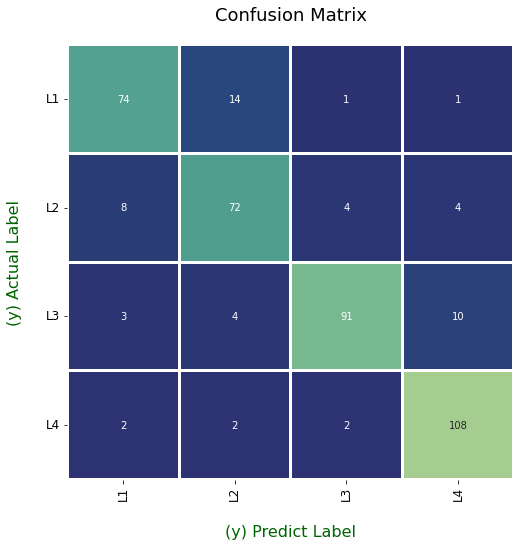

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Confusion Matrix', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Predict Label", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Actual Label", fontsize=16, color="darkgreen", labelpad=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Step 5: Save Model

In [ ]:
# Save the entire model as a SavedModel.
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
model= tf.keras.models.load_model('saved_model/my_model')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("tf_lite_model(200epochsmobnet).tflite", "wb").write(tflite_model) 

INFO:tensorflow:Assets written to: /tmp/tmph0ptkp2b/assets


2384400

In [ ]:
# model.save("model_without_kfold.h5")       # Save Model as h5
model_csv = pd.DataFrame(history.history)  # Save Model Report to csv
csv_file = "Simple_Model.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

## Step 6 : Deployment

## Implement image classification model using pre-trained model

#InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

##Step 2: Data Preparations

In [ ]:
X=np.array(COVID19_images+LUNG_images+NORMAL_images+PNEUMONIA_images).astype('float32')/255

In [ ]:
X.shape

(2000, 224, 224, 3)

In [ ]:
Y = np.array([0] * 500 + [1] * 500 + [2] * 500+ [3] * 500)    
Y

array([0, 0, 0, ..., 3, 3, 3])

## 80:20

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X , Y , train_size =0.80, test_size =0.20, random_state =30)

In [ ]:
x_train.shape

(1600, 224, 224, 3)

In [ ]:
x_test.shape

(400, 224, 224, 3)

In [ ]:
y_train.shape

(1600,)

In [ ]:
y_test.shape

(400,)

##Step3 Build Inception Model

In [ ]:
InceptionV3_model =InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [ ]:
InceptionV3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_284 (Conv2D)             (None, 111, 111, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_284[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [ ]:
for layer in InceptionV3_model.layers:
  layer.trainable =False

In [ ]:
last_output =InceptionV3_model.output

In [ ]:
temp =GlobalMaxPooling2D()(last_output)
temp =Dense(32,activation='relu')(temp)  #128
temp= Dropout(0.3)(temp)
temp =Dense(16,activation='relu')(temp) #128
temp= Dropout(0.3)(temp)
temp =Dense(16,activation='relu')(temp) #128
temp= Dropout(0.3)(temp)
temp =Dense(32,activation='relu')(temp) #128
temp= Dropout(0.3)(temp)

temp =Dense(6,activation='softmax')(temp)

In [ ]:
InceptionV3_model =tf.keras.Model(InceptionV3_model.input,temp)
InceptionV3_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
InceptionV3_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_284 (Conv2D)             (None, 111, 111, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_284[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [ ]:
start = time.time()

history =InceptionV3_model.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.2)


end = time.time()
duration = end - start
print ('\n simple  took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, 30) )



Epoch 1/50
128/128 [==============================] - 19s 111ms/step - loss: 1.8228 - accuracy: 0.2734 - val_loss: 1.2044 - val_accuracy: 0.4375
Epoch 2/50
128/128 [==============================] - 12s 98ms/step - loss: 1.2459 - accuracy: 0.3555 - val_loss: 0.9556 - val_accuracy: 0.5188
Epoch 3/50
128/128 [==============================] - 13s 98ms/step - loss: 1.1742 - accuracy: 0.4086 - val_loss: 1.0373 - val_accuracy: 0.5031
Epoch 4/50
128/128 [==============================] - 12s 97ms/step - loss: 1.2038 - accuracy: 0.4008 - val_loss: 1.1270 - val_accuracy: 0.4719
Epoch 5/50
128/128 [==============================] - 12s 97ms/step - loss: 1.1947 - accuracy: 0.4094 - val_loss: 1.0587 - val_accuracy: 0.4563
Epoch 6/50
128/128 [==============================] - 12s 94ms/step - loss: 1.1419 - accuracy: 0.4336 - val_loss: 0.9886 - val_accuracy: 0.4469
Epoch 7/50
128/128 [==============================] - 12s 94ms/step - loss: 1.1465 - accuracy: 0.4187 - val_loss: 1.0176 - val_accuracy

##Step 4 : Evaluation   Model

In [ ]:
InceptionV3_model.evaluate(x_test,y_test)

13/13 [==============================] - 4s 159ms/step - loss: 1.3867 - accuracy: 0.2200


[1.386721134185791, 0.2199999988079071]

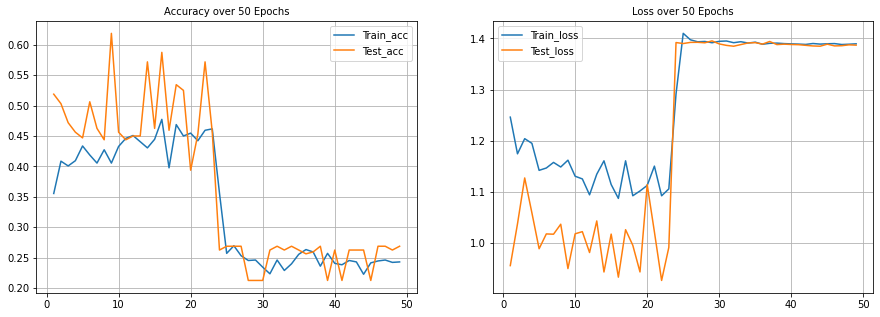

In [ ]:
plot_acc_loss(history, 50)

In [ ]:
y_pred =np.argmax(InceptionV3_model.predict(x_test),axis=-1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_test

array([3, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 0, 1, 2, 3,
       1, 3, 3, 1, 0, 2, 1, 1, 1, 3, 1, 3, 1, 0, 2, 0, 2, 1, 3, 0, 3, 2,
       0, 0, 2, 3, 3, 0, 0, 0, 3, 0, 0, 1, 0, 3, 2, 3, 3, 2, 0, 2, 2, 1,
       0, 2, 3, 2, 0, 1, 3, 0, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 3, 3, 2, 3,
       2, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 2,
       0, 3, 0, 3, 2, 1, 3, 3, 2, 1, 3, 0, 3, 3, 0, 1, 1, 3, 3, 3, 0, 1,
       0, 2, 0, 3, 3, 0, 2, 0, 3, 2, 2, 2, 1, 3, 3, 2, 0, 1, 2, 0, 3, 0,
       0, 2, 1, 3, 0, 2, 3, 2, 3, 0, 2, 2, 3, 3, 1, 1, 2, 1, 3, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 3, 3, 1, 2, 1, 2, 0, 3, 3, 3, 0,
       0, 0, 3, 1, 2, 0, 3, 3, 2, 1, 2, 3, 3, 0, 0, 1, 3, 1, 1, 0, 0, 2,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 2, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 3, 0, 1, 3, 1, 2, 1, 3, 0, 1, 2, 3, 1, 3, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 0, 3, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.2200


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['L1', 'L2', 'L3', 'L4']
cmatrix = confusion_matrix(y_test, y_pred)
creport = classification_report(y_test, y_pred, target_names=target_names)

# print("Accuracy : {:.3f}%".format(acc*100))
# print("Loss     : {:.3f}".format(loss))

print("\nClassification Report \n")
print(creport)


Classification Report 

              precision    recall  f1-score   support

          L1       0.00      0.00      0.00        90
          L2       0.22      1.00      0.36        88
          L3       0.00      0.00      0.00       108
          L4       0.00      0.00      0.00       114

    accuracy                           0.22       400
   macro avg       0.06      0.25      0.09       400
weighted avg       0.05      0.22      0.08       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


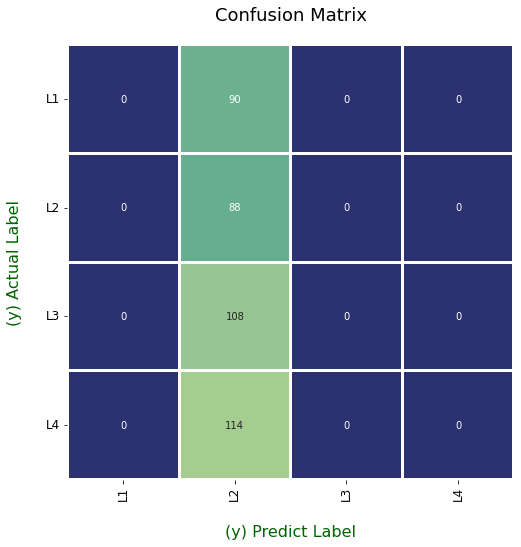

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Confusion Matrix', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Predict Label", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Actual Label", fontsize=16, color="darkgreen", labelpad=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

##Step5 : Save Model

In [ ]:
# Save the entire model as a SavedModel.
InceptionV3_model.save('saved_InceptionV3_model/my_model') 


INFO:tensorflow:Assets written to: saved_InceptionV3_model/my_model/assets


INFO:tensorflow:Assets written to: saved_InceptionV3_model/my_model/assets


In [ ]:
model= tf.keras.models.load_model('saved_InceptionV3_model/my_model')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("tf_lite_model(200epochsmobnet).tflite", "wb").write(tflite_model) 


INFO:tensorflow:Assets written to: /tmp/tmp2sbljvyc/assets


INFO:tensorflow:Assets written to: /tmp/tmp2sbljvyc/assets


87392500

In [ ]:
# model.save("model_without_kfold.h5")       # Save Model as h5
model_csv = pd.DataFrame(history.history)  # Save Model Report to csv
csv_file = "InceptionV3_Model.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

##Step 6 : Deployment Model

#VGG16

In [ ]:
X=np.array(COVID19_images+LUNG_images+NORMAL_images+PNEUMONIA_images).astype('float32')/255

In [ ]:
X.shape

(2000, 224, 224, 3)

In [ ]:
Y = np.array([0] * 500 + [1] * 500 + [2] * 500+ [3] * 500)    
Y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X , Y , train_size =0.80, test_size =0.20, random_state =30)

In [ ]:
x_train.shape

(1600, 224, 224, 3)

In [ ]:
x_test.shape

(400, 224, 224, 3)

In [ ]:
y_train.shape

(1600,)

In [ ]:
y_test.shape

(400,)

In [ ]:
VGG16_model =VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [ ]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in VGG16_model.layers[:15]:
  layer.trainable = False
for layer in VGG16_model.layers[15:]:
  layer.trainable =True

In [ ]:
last_layer = VGG16_model.get_layer('block5_pool')
last_output = last_layer.output

In [ ]:
temp =GlobalMaxPooling2D()(last_output)
temp =Dense(64,activation='relu')(temp)
temp= Dropout(0.3)(temp)
temp =Dense(32,activation='relu')(temp)
temp= Dropout(0.3)(temp)
temp =Dense(16,activation='relu')(temp)
temp= Dropout(0.3)(temp)
temp =Dense(6,activation='softmax')(temp)

In [ ]:
VGG16_model =tf.keras.Model(VGG16_model.input,temp)
VGG16_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
VGG16_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
start = time.time()

history=VGG16_model.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.2)


end = time.time()
duration = end - start
print ('\n simple  took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, 30) )

Epoch 1/50
128/128 [==============================] - 24s 177ms/step - loss: 1.5838 - accuracy: 0.2633 - val_loss: 1.4044 - val_accuracy: 0.2125
Epoch 2/50
128/128 [==============================] - 22s 174ms/step - loss: 1.4049 - accuracy: 0.2422 - val_loss: 1.3860 - val_accuracy: 0.2688
Epoch 3/50
128/128 [==============================] - 21s 161ms/step - loss: 1.4038 - accuracy: 0.2422 - val_loss: 1.3862 - val_accuracy: 0.2688
Epoch 4/50
128/128 [==============================] - 21s 161ms/step - loss: 1.3945 - accuracy: 0.2609 - val_loss: 1.3874 - val_accuracy: 0.2688
Epoch 5/50
128/128 [==============================] - 22s 174ms/step - loss: 1.3957 - accuracy: 0.2344 - val_loss: 1.3833 - val_accuracy: 0.2625
Epoch 6/50
128/128 [==============================] - 21s 161ms/step - loss: 1.3938 - accuracy: 0.2438 - val_loss: 1.3901 - val_accuracy: 0.2688
Epoch 7/50
128/128 [==============================] - 21s 161ms/step - loss: 1.3959 - accuracy: 0.2586 - val_loss: 1.3856 - val_ac

In [ ]:
VGG16_model.evaluate(x_test,y_test)

13/13 [==============================] - 3s 225ms/step - loss: 0.2863 - accuracy: 0.9225


[0.28628870844841003, 0.9225000143051147]

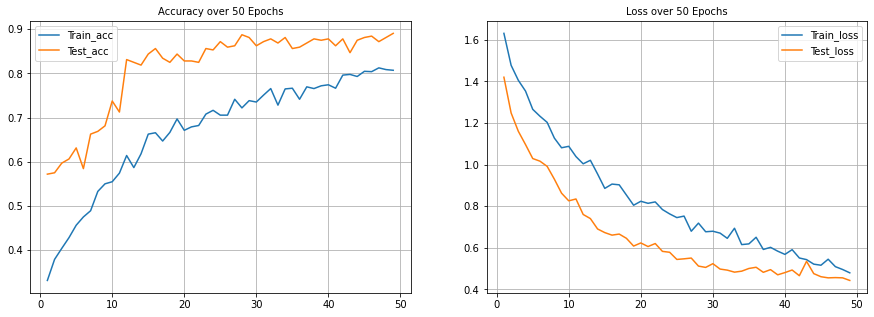

In [ ]:
plot_acc_loss(history, 50)

In [ ]:
y_pred =np.argmax(InceptionV3_model.predict(x_test),axis=-1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_test

array([3, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 0, 1, 2, 3,
       1, 3, 3, 1, 0, 2, 1, 1, 1, 3, 1, 3, 1, 0, 2, 0, 2, 1, 3, 0, 3, 2,
       0, 0, 2, 3, 3, 0, 0, 0, 3, 0, 0, 1, 0, 3, 2, 3, 3, 2, 0, 2, 2, 1,
       0, 2, 3, 2, 0, 1, 3, 0, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 3, 3, 2, 3,
       2, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 2,
       0, 3, 0, 3, 2, 1, 3, 3, 2, 1, 3, 0, 3, 3, 0, 1, 1, 3, 3, 3, 0, 1,
       0, 2, 0, 3, 3, 0, 2, 0, 3, 2, 2, 2, 1, 3, 3, 2, 0, 1, 2, 0, 3, 0,
       0, 2, 1, 3, 0, 2, 3, 2, 3, 0, 2, 2, 3, 3, 1, 1, 2, 1, 3, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 3, 3, 1, 2, 1, 2, 0, 3, 3, 3, 0,
       0, 0, 3, 1, 2, 0, 3, 3, 2, 1, 2, 3, 3, 0, 0, 1, 3, 1, 1, 0, 0, 2,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 2, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 3, 0, 1, 3, 1, 2, 1, 3, 0, 1, 2, 3, 1, 3, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 0, 3, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0,

##Step 4 : Evaluation  Model
# ส่วนใหม่

### classification_report

# ##Confusion Matrix

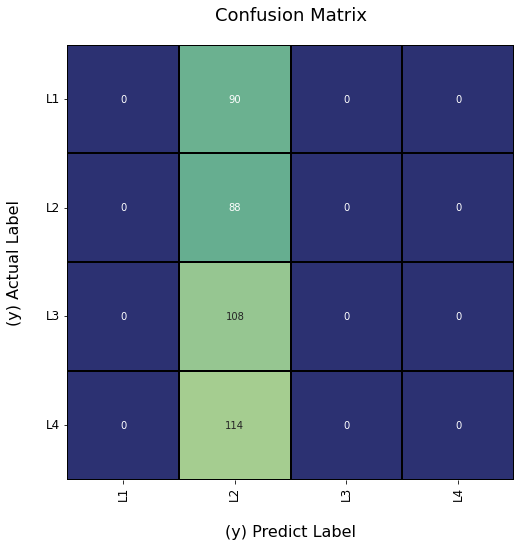

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=1, linecolor='black', cbar=False, ax=ax,) #cmap=''  crest_r
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Confusion Matrix', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Predict Label", fontsize=16, labelpad=24)
plt.ylabel("(y) Actual Label", fontsize=16, labelpad=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# ##Save Model VGG16

In [ ]:
# Save the entire model as a SavedModel.
VGG16_model.save('saved_VGG16_model/my_model') 

model= tf.keras.models.load_model('saved_VGG16_model/my_model')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("tf_lite_model(VGG16_model).tflite", "wb").write(tflite_model) 

# model.save("model_without_kfold.h5")       # Save Model as h5
model_csv = pd.DataFrame(history.history)  # Save Model Report to csv
csv_file = "VGG16_modell.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

INFO:tensorflow:Assets written to: saved_VGG16_model/my_model/assets


INFO:tensorflow:Assets written to: saved_VGG16_model/my_model/assets


INFO:tensorflow:Assets written to: /tmp/tmpfld2zazv/assets


INFO:tensorflow:Assets written to: /tmp/tmpfld2zazv/assets


#MobileNet

In [ ]:
X=np.array(COVID19_images+LUNG_images+NORMAL_images+PNEUMONIA_images).astype('float32')/255

In [ ]:
X.shape

(2000, 224, 224, 3)

In [ ]:
Y = np.array([0] * 500 + [1] * 500 + [2] * 500+ [3] * 500)    
Y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X , Y , train_size =0.80, test_size =0.20, random_state =30)

In [ ]:
x_train.shape

(1600, 224, 224, 3)

In [ ]:
x_test.shape

(400, 224, 224, 3)

In [ ]:
y_train.shape

(1600,)

In [ ]:
y_test.shape

(400,)

In [ ]:
MobileNet_model =MobileNet(input_shape=(224,224,3),include_top=False,weights='imagenet')
MobileNet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
baseMobileNet_model = MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))

MobileNet_model = Sequential()
# MobileNet_model.add(GlobalMaxPooling2D())
MobileNet_model.add(baseMobileNet_model) 
MobileNet_model.add(Flatten()) 
MobileNet_model.add(Dense(128,activation=('relu'),input_dim=64)) 
MobileNet_model.add(Dense(128,activation=('relu'))) 
# model_mobnet.add(MaxPooling2D(pool_size=(2,2)))
MobileNet_model.add(Dropout(0.3))
MobileNet_model.add(Dense(64,activation=('relu'))) 
MobileNet_model.add(Dense(64,activation=('relu'))) 
MobileNet_model.add(Dropout(0.3))
MobileNet_model.add(Dense(32,activation=('relu')))
MobileNet_model.add(Dense(32,activation=('relu')))
MobileNet_model.add(Dropout(0.3))
MobileNet_model.add(Dense(6,activation=('softmax')))

In [ ]:
MobileNet_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
MobileNet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [ ]:
start = time.time()

history =MobileNet_model.fit(x_train,y_train,batch_size=10,epochs=50,validation_split=0.2)


end = time.time()
duration = end - start
print ('\n simple  took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, 30) )



Epoch 1/50
128/128 [==============================] - 20s 130ms/step - loss: 2.9571 - accuracy: 0.2937 - val_loss: 17.4003 - val_accuracy: 0.2125
Epoch 2/50
128/128 [==============================] - 16s 121ms/step - loss: 1.2537 - accuracy: 0.3914 - val_loss: 1.2439 - val_accuracy: 0.3500
Epoch 3/50
128/128 [==============================] - 16s 122ms/step - loss: 1.1980 - accuracy: 0.3992 - val_loss: 1.1759 - val_accuracy: 0.4406
Epoch 4/50
128/128 [==============================] - 16s 126ms/step - loss: 1.1019 - accuracy: 0.4062 - val_loss: 0.8956 - val_accuracy: 0.4531
Epoch 5/50
128/128 [==============================] - 16s 121ms/step - loss: 1.1558 - accuracy: 0.4352 - val_loss: 1.3894 - val_accuracy: 0.2875
Epoch 6/50
128/128 [==============================] - 16s 122ms/step - loss: 1.1776 - accuracy: 0.4172 - val_loss: 1.8243 - val_accuracy: 0.2688
Epoch 7/50
128/128 [==============================] - 16s 121ms/step - loss: 1.1330 - accuracy: 0.4172 - val_loss: 1.0235 - val_a

 ## Step4 : Evaluation  Model 
 

In [ ]:
MobileNet_model.evaluate(x_test,y_test)

13/13 [==============================] - 2s 82ms/step - loss: 1.3912 - accuracy: 0.2250


[1.391190528869629, 0.22499999403953552]

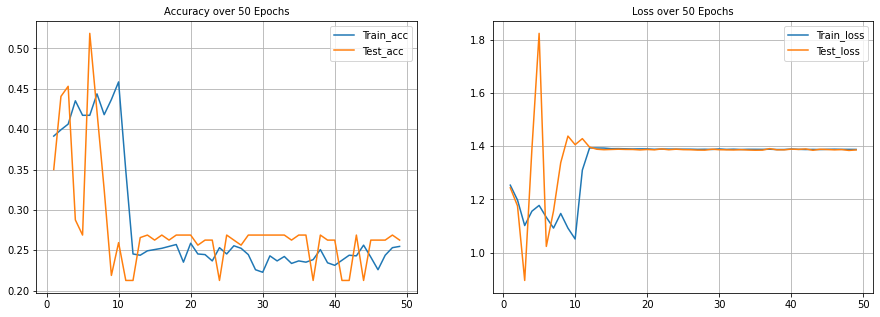

In [ ]:
plot_acc_loss(history, 50)

In [ ]:
y_pred =np.argmax(MobileNet_model.predict(x_test),axis=-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([3, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 0, 1, 2, 3,
       1, 3, 3, 1, 0, 2, 1, 1, 1, 3, 1, 3, 1, 0, 2, 0, 2, 1, 3, 0, 3, 2,
       0, 0, 2, 3, 3, 0, 0, 0, 3, 0, 0, 1, 0, 3, 2, 3, 3, 2, 0, 2, 2, 1,
       0, 2, 3, 2, 0, 1, 3, 0, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 3, 3, 2, 3,
       2, 3, 2, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 2,
       0, 3, 0, 3, 2, 1, 3, 3, 2, 1, 3, 0, 3, 3, 0, 1, 1, 3, 3, 3, 0, 1,
       0, 2, 0, 3, 3, 0, 2, 0, 3, 2, 2, 2, 1, 3, 3, 2, 0, 1, 2, 0, 3, 0,
       0, 2, 1, 3, 0, 2, 3, 2, 3, 0, 2, 2, 3, 3, 1, 1, 2, 1, 3, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 3, 3, 1, 2, 1, 2, 0, 3, 3, 3, 0,
       0, 0, 3, 1, 2, 0, 3, 3, 2, 1, 2, 3, 3, 0, 0, 1, 3, 1, 1, 0, 0, 2,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 2, 1, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 3, 0, 1, 3, 1, 2, 1, 3, 0, 1, 2, 3, 1, 3, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 0, 3, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0,

##Step 4 : Evaluation  Model


In [ ]:
MobileNet_model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 72ms/step - loss: 1.3912 - accuracy: 0.2250


[1.391190528869629, 0.22499999403953552]

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.2250


##Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['L1', 'L2', 'L3', 'L4']
cmatrix = confusion_matrix(y_test, y_pred)
creport = classification_report(y_test, y_pred, target_names=target_names)

# print("Accuracy : {:.3f}%".format(acc*100))
# print("Loss     : {:.3f}".format(loss))

print("\nClassification Report \n")
print(creport)


Classification Report 

              precision    recall  f1-score   support

          L1       0.23      1.00      0.37        90
          L2       0.00      0.00      0.00        88
          L3       0.00      0.00      0.00       108
          L4       0.00      0.00      0.00       114

    accuracy                           0.23       400
   macro avg       0.06      0.25      0.09       400
weighted avg       0.05      0.23      0.08       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Confusion Matrix

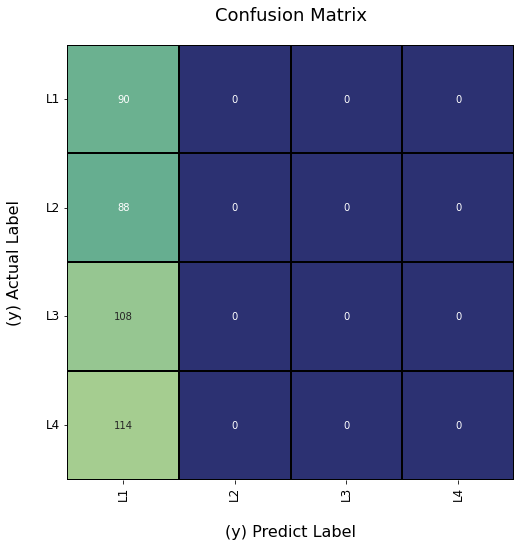

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=1, linecolor='black', cbar=False, ax=ax,) #cmap=''  crest_r
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Confusion Matrix', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Predict Label", fontsize=16, labelpad=24)
plt.ylabel("(y) Actual Label", fontsize=16, labelpad=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Step 5: Save MobileNet_model

In [ ]:
# Save the entire model as a SavedModel.
MobileNet_model.save('saved_MobileNet_model/my_model') 

model= tf.keras.models.load_model('saved_MobileNet_model/my_model')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("tf_lite_model(MobileNet_model).tflite", "wb").write(tflite_model) 

# model.save("model_without_kfold.h5")       # Save Model as h5
model_csv = pd.DataFrame(history.history)  # Save Model Report to csv
csv_file = "MobileNet_model_.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

INFO:tensorflow:Assets written to: saved_MobileNet_model/my_model/assets


INFO:tensorflow:Assets written to: saved_MobileNet_model/my_model/assets


INFO:tensorflow:Assets written to: /tmp/tmp4k9sc3yh/assets


INFO:tensorflow:Assets written to: /tmp/tmp4k9sc3yh/assets
